# Wine Quality Prediction: Introduction to Data Science project 
## Part C: Machine learning: classification problem.
## Members: 
* Aastha Agarwal(16ucc003)
* Amisha Gupta(16ucs031)
* Divya Baid(16ucc031)
* Komal Kungwani(16ucs093)

### About Dataset:
Wine tasting and quality testing activity is done worldwide. This data set provides information of wine contents and corresponding quality of the sample taken. Quality ranges from 0 to 10.
### Dataset used: Red wine quality. _[Link](https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009)_
The following attributes are present in the dataset:
* fixed acidity
* volatile acidity
* citric acid
* residual sugar
* chlorides
* free sulfur dioxide
* total sulfur dioxide
* density
* pH
* sulphates
* alcohol
* quality (score between 0 and 10) 

We perform classification of wine quality to good/bad scaling quality above 5.5 as good and below 5.5 as bad.


## Imprting Libraries and reading data

In [2]:
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the data and the fisrt 5 rows-
data = pd.read_csv('winequality-red.csv')
# View first 5 entries of the dataset.
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Data Cleaning and study

We study the attributes, relationships shared by them and clean null valued samples. Analysis of individual attributes and their relationship with our class attribute 'quality' is done.

In [4]:
# Features provided in the data
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
#Information about the attributes of the data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Total number of samples taken: **1599**
It is seen that all the attributes are numerical. Also, all tuples have not null data. Hence, cleaning for null values is not required.
Our class attribute is 'quality' which is already in numerical form will be the output variable, perdicted by classification algorithm used.


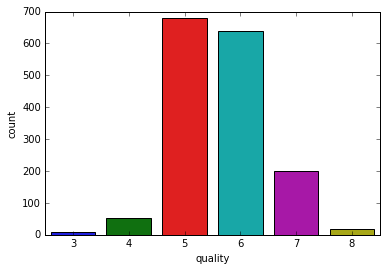

In [6]:
#Bar graph to see quality distribution of our dataset.
sns.countplot(data['quality'],label="Count")

The above bar graph shows that quality ranges between 3-8 for the sample dataset. It can be seen that most wines lie between 5-6.
### Study of values of quality in relationship with other attributes using boxplots.

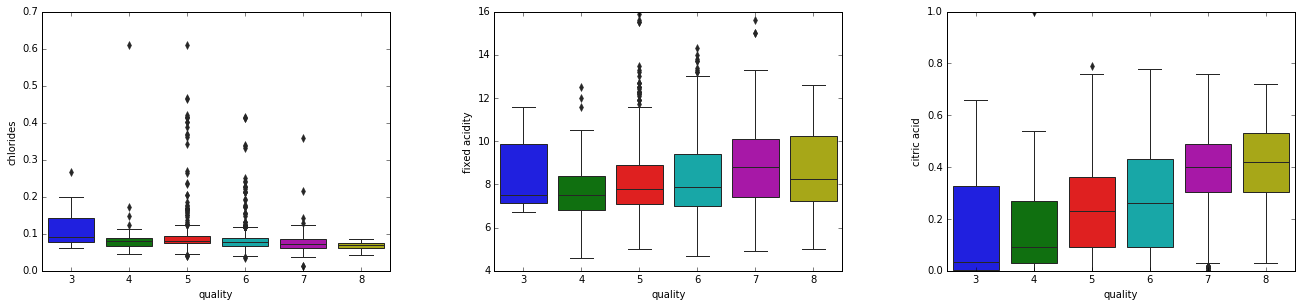

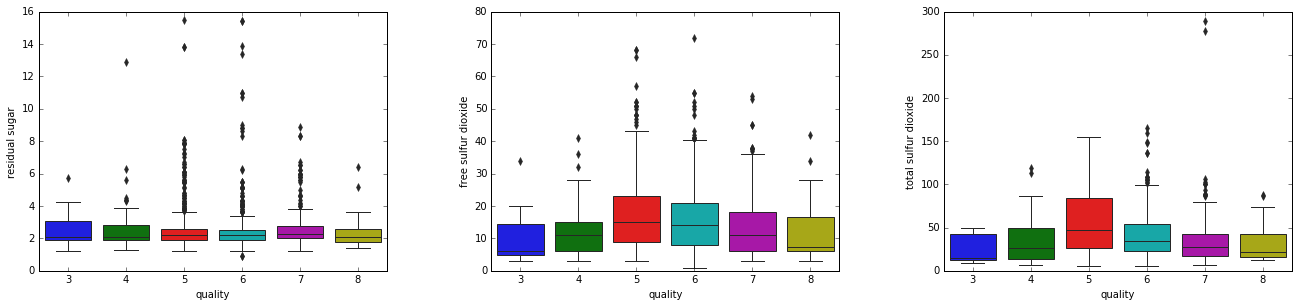

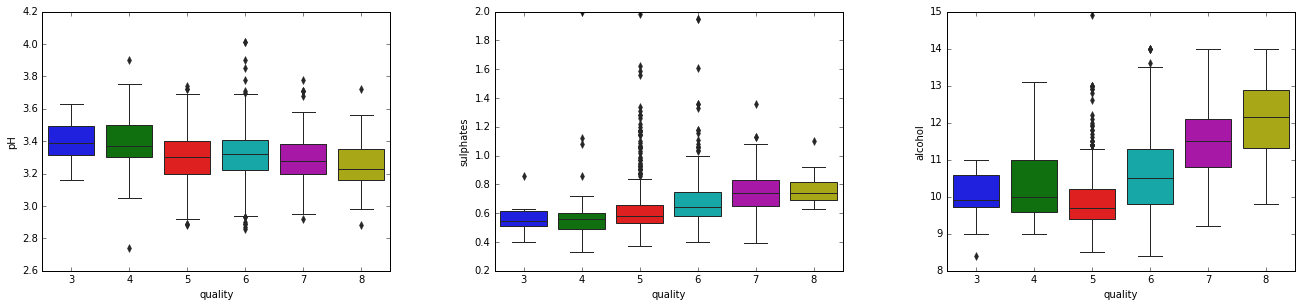

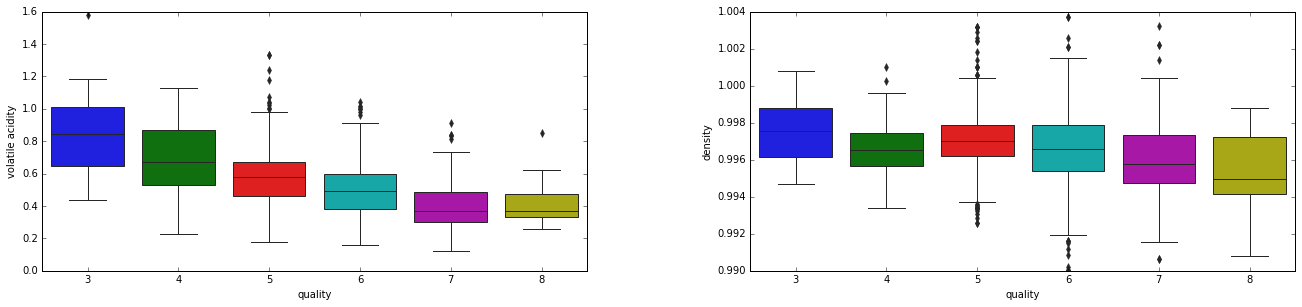

In [7]:
# Boxplots to study individual attribute relationships with 'quality'.
left  = 0.1  # the left side of the subplots of the figure
right = 3    # the right side of the subplots of the figure
bottom = 0.1   # the bottom of the subplots of the figure
top = 1      # the top of the subplots of the figure
wspace = 0.3   # the amount of width reserved for blank space between subplots
hspace = 0.2   # the amount of height reserved for white space between subplots

f, axes = plt.subplots(1, 3)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
sns.boxplot('quality', 'chlorides', data = data,   ax=axes[0])
sns.boxplot('quality', 'fixed acidity', data = data,  orient='v' , ax=axes[1])
sns.boxplot('quality', 'citric acid', data = data,  orient='v' , ax=axes[2])

f, axes = plt.subplots(1, 3)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
sns.boxplot('quality', 'residual sugar', data = data,  orient='v' , ax=axes[0])
sns.boxplot('quality', 'free sulfur dioxide', data = data,  orient='v' , ax=axes[1])
sns.boxplot('quality', 'total sulfur dioxide', data = data,  orient='v' , ax=axes[2])

f, axes = plt.subplots(1, 3)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
sns.boxplot('quality', 'pH', data = data,  orient='v' , ax=axes[0])
sns.boxplot('quality', 'sulphates', data = data,  orient='v' , ax=axes[1])
sns.boxplot('quality', 'alcohol', data = data,  orient='v' , ax=axes[2])

f, axes = plt.subplots(1, 2)
plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
sns.boxplot('quality', 'volatile acidity', data = data,  orient='v' , ax=axes[0])
sns.boxplot('quality', 'density', data = data,  orient='v' , ax=axes[1])

### Statistical analysis of attributes

In [8]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


### Scaling attribute 'quality'
The mean of of all the attributes vary largely. This indicates that normalisation of attributes would be required before clalssifcation. 
From the the countplots and boxplots, it seems feasible to divide the attribute 'quality' as 0 for quality>5.5 because count is more below the value of 5.5 in the sample dataset.

In [9]:
# Divide the 'quality' attribute for classifcation as Good/Bad:1/0. Rule applied: 1<- (quality>5.5).
data.quality = [1 if each >5.5 else 0 for each in data.quality]
data['quality'].value_counts()

1    855
0    744
Name: quality, dtype: int64

### Principal Component Analysis and Data Preprocessing
The purpose for doing principal component analysis is to observe the variance explained by each of the components and the associated weights assigned to each attribute. The results can help in deciding the unecessary attributes which can be dropped.

In [10]:
# Sklearn Library is used for PCA. 
from sklearn.decomposition import PCA
# useful_data contains all rows and attributes except id.
useful_data = data.iloc[:,1:]
# Take n_components=4. i.e. Check for variance taking upto 4 dimensions.
pca = PCA(n_components=4)
# Fit the model with useful_data
pca.fit(useful_data)

# Dimmension indexing
dimensions  = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

# Individual PCA Components in given dimensions
components = pd.DataFrame(np.round(pca.components_, 4),columns=useful_data.keys())
components.index = dimensions

# Explained variance in PCA
ratios = pca.explained_variance_ratio_.reshape(len(pca.components_),1)
variancce_rations = pd.DataFrame(np.round(ratios,4),columns=['Explained Variance'])
variancce_rations.index = dimensions

print(pd.concat([variancce_rations, components], axis=1))

             Explained Variance  volatile acidity  citric acid  \
Dimension 1              0.9488            0.0004       0.0002   
Dimension 2              0.0485           -0.0020      -0.0029   
Dimension 3              0.0016           -0.0044       0.0234   
Dimension 4              0.0009           -0.0359       0.0223   

             residual sugar  chlorides  free sulfur dioxide  \
Dimension 1          0.0087     0.0001               0.2189   
Dimension 2          0.0113    -0.0002               0.9755   
Dimension 3          0.9884     0.0009              -0.0148   
Dimension 4         -0.1497    -0.0099              -0.0123   

             total sulfur dioxide  density      pH  sulphates  alcohol  \
Dimension 1                0.9757   0.0000 -0.0003     0.0002  -0.0064   
Dimension 2               -0.2188  -0.0000  0.0032     0.0006   0.0145   
Dimension 3               -0.0044   0.0004 -0.0075     0.0012   0.1456   
Dimension 4                0.0111  -0.0010  0.0272     0.

It can be observed that 94.88% of the variance is explained in dimmension 1. Rest three dimensions contribute to very little variance. 

In dimension 1, most of the feature weight is associated with the total sulfer dioxide and free sulfer dioxide. It can be seen that they are important for prediction of wine quality.
Weight associated with density is zero and that of chlorides is negligible. Further analysis of correlation of attributes can aid in dropping some of the attributes.

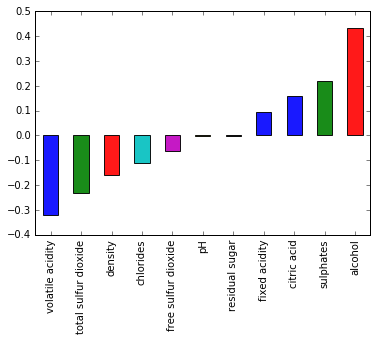

In [11]:
# Observe correlation to the diagnosis
temp = data.corr()['quality'].copy()
corr_data = temp.drop('quality')
corr_data.sort_values(inplace=True)

corr_data.plot(kind='bar', alpha=0.9)

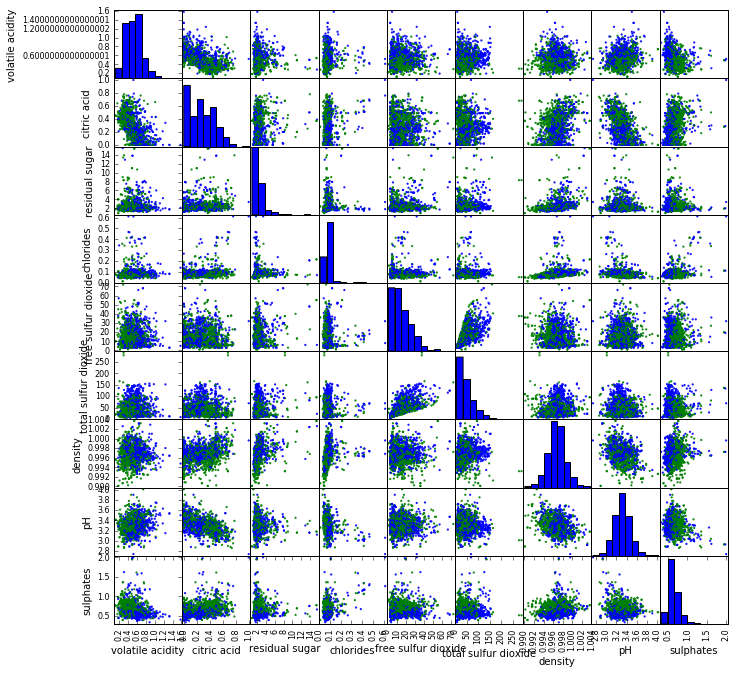

In [12]:
observables = data.iloc[:,1:10]
color_wheel = {0: "blue", 1: "green"}
colors = data["quality"].map(lambda x: color_wheel.get(x))
pd.plotting.scatter_matrix(observables, c=colors, alpha = 0.9, figsize = (11, 11), diagonal = 'hist');

The scatter matrix shows that none of the attributes show strong linear correlation. Quality of wine lies majorly of a small range of chlorides as vertical lines can be seen. Density and volatile acidity show rough and distributed correlation. Hence, these attributes can be dropped.

Since good/bad class attribute is roughly correlated, application of Support Vector Machines is not feasible. 


In [13]:
#Dropping the above stated attributes.
data.drop(['chlorides','volatile acidity','density'],axis=1,inplace=True)

## Classifcation and Prediction
### Choosing Classification Model
Since dataset is small and fully numerical, KNNs would be feasible and make a good choice as a classification model. Also, PCA and scatter matrix showed that attributes are not correlated. Hence, decision trees also would make a good classfication model.
 


In [14]:
#split data
from sklearn.model_selection import train_test_split
useful_data =  data.iloc[:,1:10]
X_train, X_test, y_train, y_test = train_test_split(useful_data, data['quality'], test_size=0.20,random_state=5)

### Data scaling
Scaling is needed because attribute values ranges varied widely. Hence, StandardScaler is used to transform the data. 


In [15]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

/home/srishti/.local/lib/python3.5/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


### KNN Classifier
KNN classifier from sklearn library is used. 

#### Choosing the value of k
First, we choose the value of k based on plot for precision values for k ranging from \[1,25\]. 

[0.9943 0.9971 0.9958 0.9958 0.9915 0.9958 0.9943 0.9943 0.9914 0.9943
 0.9915 0.9957 0.9928 0.9957 0.9914 0.9928 0.9914 0.9942 0.9928 0.9942
 0.9928 0.9942 0.9942 0.9942]


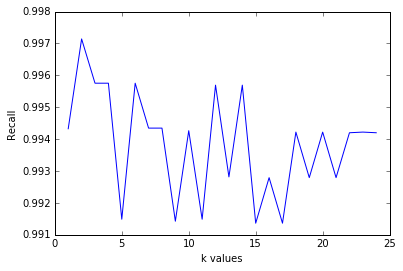

In [16]:
# value of k computed with cross validation scoring and precision
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
knn=KNeighborsClassifier()
k_range=list(range(1,25))
k_scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn, X_train,y_train,cv=10,scoring='precision')
    k_scores.append(scores.mean())
print(np.round(k_scores,4)) 
from matplotlib import pyplot as plt
plt.plot(k_range,k_scores,color="blue")
plt.xlabel('k values')
plt.ylabel('Recall')
plt.show()

#### Model training
Plot of Precision v/s k values show that best precision lies around 2. On the basis of these results, we take k=2.
For the KNN classifier, we take distance metric 'euclidean'.

In [17]:
#Fit training data
classifier = KNeighborsClassifier(n_neighbors=2,metric='euclidean')  
classifier.fit(X_train, y_train) 

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
           metric_params=None, n_jobs=None, n_neighbors=2, p=2,
           weights='uniform')

In [18]:
# Prediction on test data
y_pred = classifier.predict(X_test)  

#### Classification Report

Confusion matrix
 [[158   1]
 [  2 159]] 

Confusion matrix plot


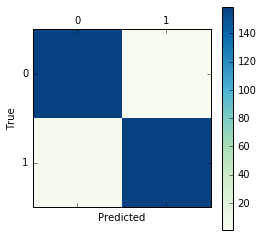

Classfication report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       159
           1       0.99      0.99      0.99       161

   micro avg       0.99      0.99      0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

Accuracy score
0.990625


In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  
c_m = confusion_matrix(y_test, y_pred)
print ("Confusion matrix\n", c_m,'\n')
ax=plt.matshow(c_m,cmap=plt.cm.GnBu)
print('Confusion matrix plot')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print ("Classfication report")
print(classification_report(y_test, y_pred)) 
print ("Accuracy score")
print (accuracy_score(y_test,y_pred))

### Decision Trees
DecisionTreeClassifier is used.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# Fit training data
classifier = DecisionTreeClassifier()
classifier.fit(X_train,y_train)

In [20]:
# Predict test data
y_pred = classifier.predict(X_test)

Confusion matrix
 [[158   1]
 [  2 159]] 

Confusion matrix plot


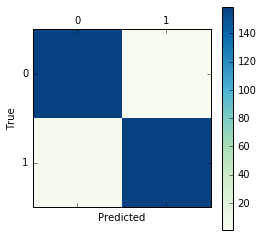

Classfication report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       159
           1       0.99      0.99      0.99       161

   micro avg       0.99      0.99      0.99       320
   macro avg       0.99      0.99      0.99       320
weighted avg       0.99      0.99      0.99       320

Accuracy score
0.990625


In [21]:
c_m = confusion_matrix(y_test, y_pred)
print ("Confusion matrix\n", c_m,'\n')
ax=plt.matshow(c_m,cmap=plt.cm.GnBu)
print('Confusion matrix plot')
plt.colorbar(ax)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print ("Classfication report")
print(classification_report(y_test, y_pred)) 
print ("Accuracy score")
print (accuracy_score(y_test,y_pred))

## Conclusions